### Importing Libs

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier

### Reading Data

In [4]:
data=pd.read_csv("Crop_recommendation.csv")

### Separating Features & Target Variables

In [5]:
features=data[["N","P","K","ph","temperature","humidity","rainfall"]]
target=data["label"]
labels=data["label"]

### Splitting the Dataset

In [6]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(features,target,test_size=0.3,random_state=2)

### Applying Random Forest

In [7]:
RF=RandomForestClassifier(n_estimators=20,random_state=0)
RF.fit(Xtrain,Ytrain)

RandomForestClassifier(n_estimators=20, random_state=0)

### Predicting Test Values

In [8]:
predicted_values=RF.predict(Xtest)

### Model Evaluation

In [9]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
report=classification_report(Ytest,predicted_values)
print(report)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.94      0.94      0.94        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      1.00      1.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00        42
      papaya       1.00    

In [10]:
# Test Accuracy
x=metrics.accuracy_score(Ytest,predicted_values)
print(x)

0.9939393939393939


In [11]:
# Train Accuracy
print(RF.score(Xtrain,Ytrain))

1.0


In [12]:
print(RF.score(Xtest,Ytest))

0.9939393939393939


### Cross Validation 

In [13]:
score = cross_val_score(RF,features,target,cv=5)
print(score)

[0.99772727 0.99090909 0.99772727 0.99090909 0.98636364]


In [14]:
#Cross Validation Accuracy
print(score.mean())

0.9927272727272728


### Visualizing Accuracies 

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
scores=[1.0,0.9939393939393939,0.9927272727272728]
labels=["Train","Test","CV"]

(0.5, 1.0)

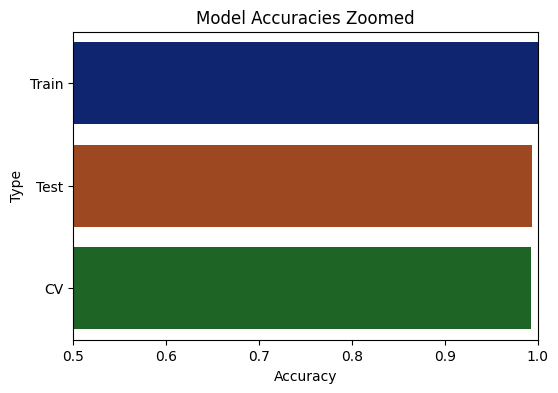

In [17]:
plt.figure(figsize=[6,4],dpi = 100)
plt.title('Model Accuracies Zoomed')
plt.xlabel('Accuracy')
plt.ylabel('Type')
sns.barplot(x = scores,y = labels,palette='dark')
plt.xlim(0.5,1)

### Predictive Function

In [21]:
def predict_crop_label(input_features):
    
    
    input_features = np.array(input_features).reshape(1, -1) 
    
    # Predict the crop label using the LogReg model
    predicted_label = RF.predict(input_features)
    
    return predicted_label[0]  # Return the predicted label

# Example usage:
user_input = [83, 45, 60, 28, 70.3, 7.0, 150.9]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)

user_input = [60,18, 30, 23.603016, 60.3, 8, 40.91]  # Example input features (N, P, K, pH, temperature, humidity, rainfall)
predicted_crop_label = predict_crop_label(user_input)
print("Predicted Crop Label:", predicted_crop_label)


Predicted Crop Label: coffee
Predicted Crop Label: kidneybeans


In [19]:
import pickle
filename='RF_Crop.sav'
pickle.dump(RF, open(filename, 'wb'))